# Connect to database and develop simple queries
In this notebook, we use the psycopg2 library in Python to connect to an online postgreSQL database and conduct some simple queries of the data using postgres. The Postgres query language is a variant of the SQL standard.
We will use the popular Pandas library to allow us to display and interact with the data resulting form the queries.

##Connect to database
First import the library used to connect to the database - we use the psycopg2 and SQLAlchemy libraries.


In [ ]:
import psycopg2
from sqlalchemy import create_engine, text
from sqlalchemy.engine.url import URL
import pandas as pd
import pandas.io.sql as sqlio

The URL.create() method of the SQLAlchemy library generates the connection string we pass to the connection engine. The database you are connecting to is hosted on a cloud service called Render (that means we can access it from this notebook).
<li> The host is the address of the server - in this case an instance of the Render hosting service </li>
<li> The database name on the host (TCP/IP) </li>
<li> The TCP/IP port - the standard for postgreSQL is 5432 </li>
<li> The database user name and password </li>


In [ ]:
connectionURL = URL.create("postgresql+psycopg2",
                           username="hsst_b2_user",
                           password="Ieg9wLhoZ9ra46bwjgsXTjjrMyMDIuNs",
                           host="dpg-cnsp2dvsc6pc73brtlf0-a.frankfurt-postgres.render.com",
                           database="hsst_b2_sql")
connection_engine = create_engine(connectionURL)

The actual SQL query itself is assigned to a variable.
This query selects everything from the "SIM_AV_PATIENT" table of the Cancer Services and Outcomes dataset. Using the LIMIT command means we only select the first 100 rows of data from the table. As we're writing the query as a string variable we need to escape the quotation marks that are part of the command.

It can be easier to arrange a query into different lines:
<li> The first line specifies the variables to be selected
<li> The second line specifies the table toi select from
<li> The last line modifies the pervious commands to only select 100 rows

In [ ]:
sql= "SELECT * " \
     "FROM \"SIM_AV_PATIENT\" " \
     "LIMIT 100"


Run the query against the database connection and write the output to a Pandas dataframe.

In [ ]:
with connection_engine.connect() as connection:
  data = pd.DataFrame(connection.execute(text(sql)))
  connection.close()

Use the display command to examine the resulting data. Clicking the 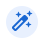 magic table icon will allow you to explore the table in an interactive way.

In [ ]:
display(data)

The PATIENTID variable allows us to link across all the different tables. The causes of death are ICD10 codes. Look up some of them https://icd.who.int/browse10/2019/en